# Cifar10 Image Classification
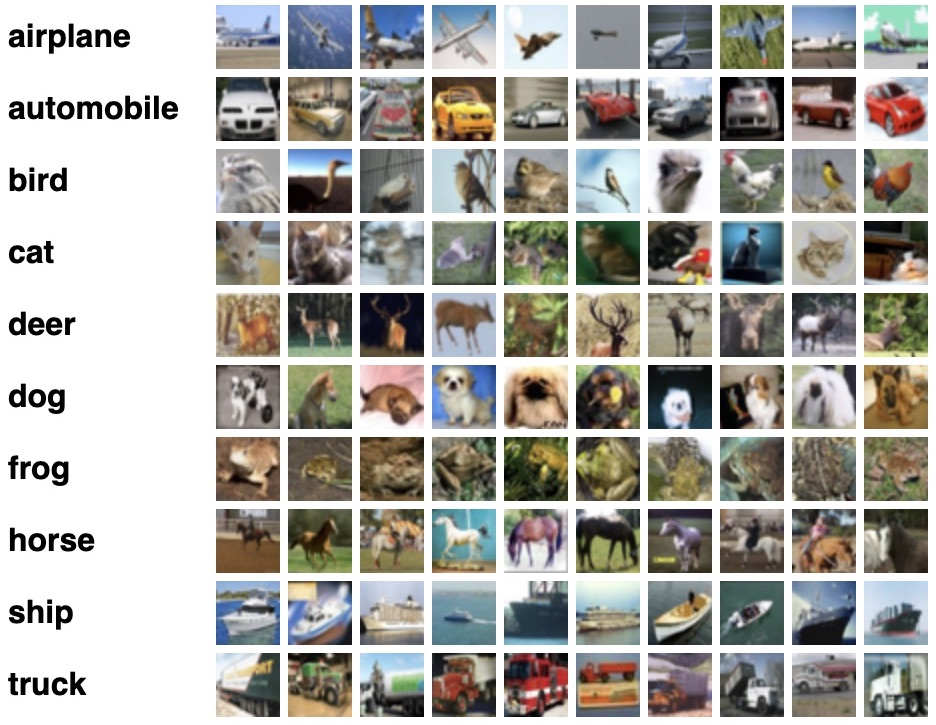

#### 10 Classes of 32x32 pixel color images

## Imports

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import sys
import os

import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import itertools
%matplotlib inline

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

## Model Definition
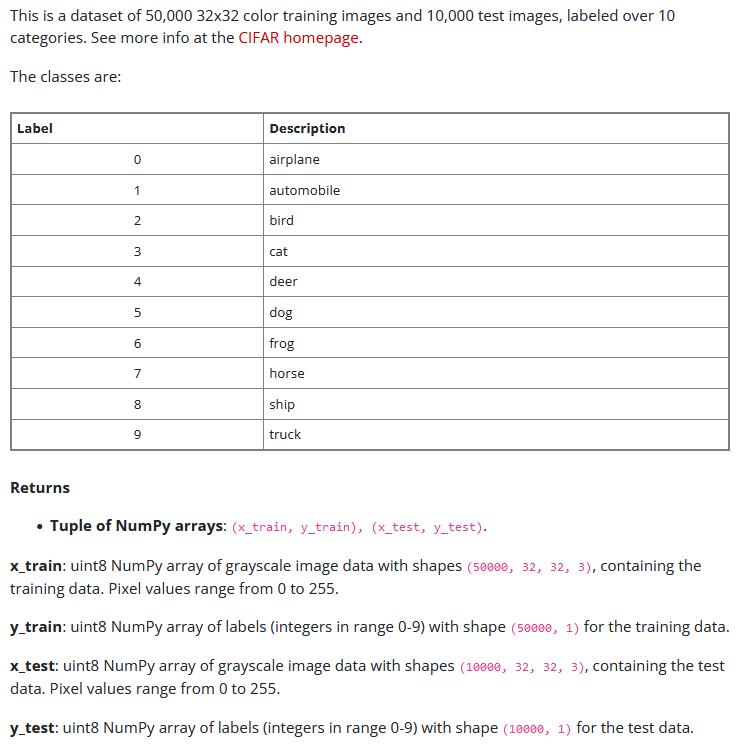

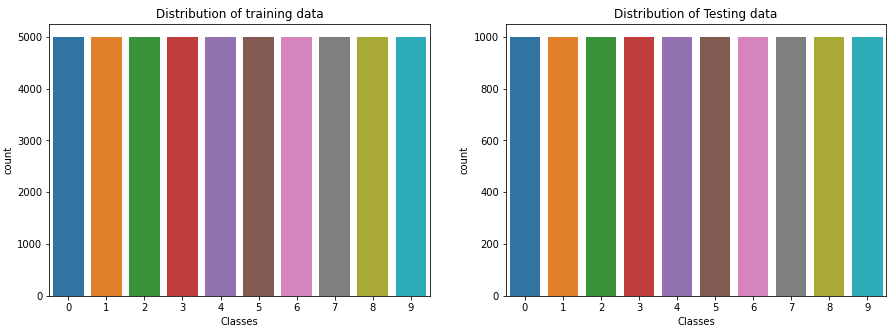

In [ ]:
# Defining the model. 
# Default augmentation if data augmentation is False.
# Classes index 0-9: https://keras.io/api/datasets/cifar10/#cifar10-small-images-classification-dataset
num_classes = 10
# Keras default size
batch_size = 32
#epochs = 100
epochs = 2
# With or without data augmentation
data_augmentation = False
#data_augmentation = True

## Loadning The Cifar10 Dataset

In [ ]:
# Optional
#cifar10 = tf.keras.datasets.cifar10
# Preparing and splitting train and test set:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Inspecting Dataset

In [ ]:
# Print shapes of the data.
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# There's 5000 train samples and 1000 test samples - the recommended 20% split
# The dimension of the samples are 32 x 32 color images

In [ ]:
# Check for NaN values in x_train data.
np.isnan(x_train).any()

In [ ]:
# Check for NaN values in x_test data. 
np.isnan(x_test).any()
# There are no NaN values which would need to be preprocessed. 

In [ ]:
# Plot image to view dimensions and content.
plt.imshow(x_test[1])
# The plot confirms the image dimensions.

In [ ]:
# uint8 format: 0 to 255
x_train.dtype

## Normalizing Data
### Convert Datatype and One Hot Label Encoding

In [ ]:
# Normalize the data - connvert data type to float.
# The datatype float will from the former format to: -1 to 1 or 0 to 1.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# Convert class vectors to binary class matrices with one hot encoding.
# num_classes is 10.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
# There are many different options for accomplishing this. The most important thing.
# Next is to check if the data has been properly reshaped / normalized for the convolution layer. 

#### Plot to show encoded label - From Categorical to Continious.

In [ ]:
# Shows of the encoding from categorical to continious. 
# Ex. Horse. 
plt.imshow(x_train[7])
print(y_train[7])

## Sequential Model - ReLu Activation

In [ ]:
# RELU Activation. 
model = Sequential()
# Conv
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Conv
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
model.add(Dense(512))  # With relu 512 neurons are available 
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Activation classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))
# Information about the model.
model.summary()

## Sequential Model - SeLu Activation & Lecun Initializer

In [ ]:
#m SELU and Lecun Activation.
model = Sequential()
# Conv
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],kernel_initializer='lecun_normal',bias_initializer='zeros'))
model.add(Activation('selu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='lecun_normal',bias_initializer='zeros'))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Conv
model.add(Conv2D(64, (3, 3), padding='same',kernel_initializer='lecun_normal',bias_initializer='zeros'))
model.add(Activation('selu'))
model.add(Conv2D(64, (3, 3),kernel_initializer='lecun_normal',bias_initializer='zeros'))
model.add(Activation('selu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# Flatten
model.add(Flatten())
model.add(Dense(512,kernel_initializer='lecun_normal',bias_initializer='zeros'))  # With selu 512 neurons are available 
model.add(Activation('selu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='lecun_normal',bias_initializer='zeros'))
# Softmax for multiclass  classification.
model.add(Activation('softmax'))
# Information about the model.
model.summary()

## Compile Model 
#### RMSprop Optimizer.

In [ ]:
# Initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

## Fit and Train Model
#### No Data Augmentation is applied.

In [ ]:
history = None
# If not: use default.
if not data_augmentation:
    print('Without data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test), 
              shuffle=True)
else:
    print('Data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4)

### Best result - 100 Epochs 
#### Estimated time: 3-4 Hours.
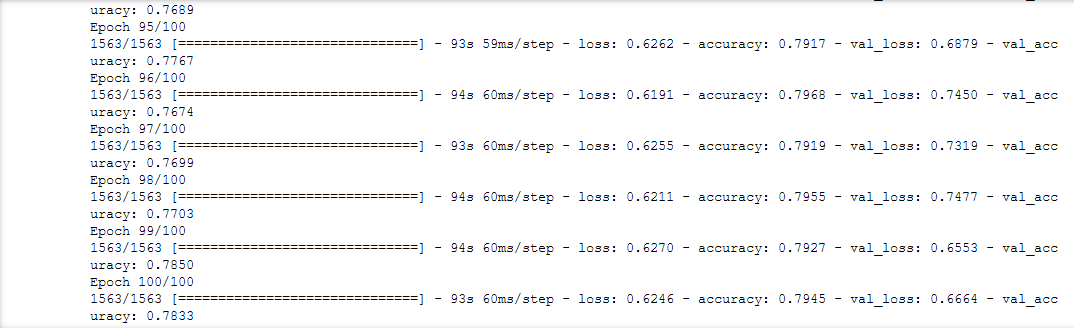

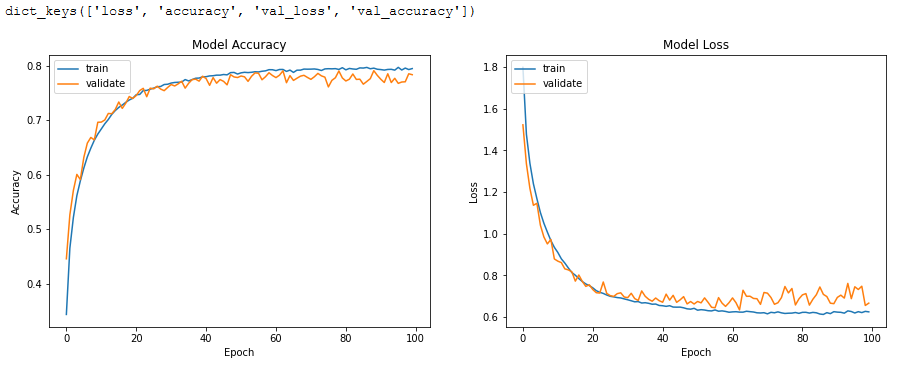

## Evaluate Model

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
pred = model.predict(x_test)

#### Accuracy and Prediction Score - 10 Epochs

 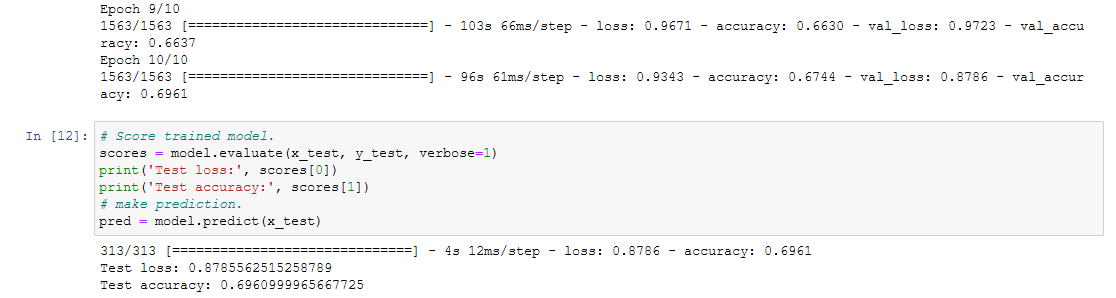

## Plot Training History

In [ ]:
# Get the best training loss scores.
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)
# Get the the best accuracy. 
ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
# Model training history plot.  
def plot_history(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # Accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # Loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()
# Data in history
print(history.history.keys())
plot_history(history)

## Classification Success

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Y_pred_classes = np.argmax(pred, axis=1) # Convert predictions classes to one hot vectors  
Y_true = np.argmax(y_test, axis=1)  # Convert validation observations to one hot vectors
errors = (Y_pred_classes - Y_true != 0)  # Errors are difference between predicted labels and true labels
# Get the predictions
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

### True Classifications

In [ ]:
# Example gallery of true classifications. 
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, rows*cols):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True Label: %s \nPredicted Label: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Error Classifications

In [ ]:
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(12,12))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, rows*cols):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True Label: %s \nPredicted Label: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

### Classification Heatmap

In [ ]:
# Heatmap of classes and predictions. 
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(confusion_mtx, annot=True, fmt='g')
heatmap.set(xticklabels=labels, yticklabels=labels)

### Classification Report

In [ ]:
# Print the classification report. 
print(classification_report(Y_true, Y_pred_classes))

#### Ex. After 10 Epochs
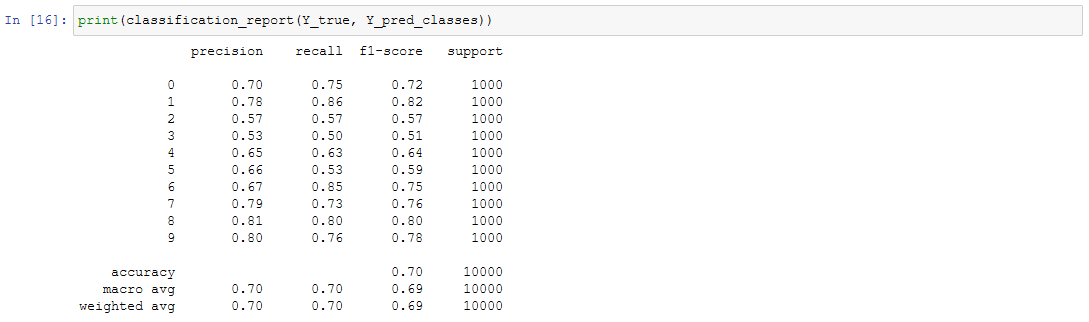

## Save Model
#### Can also be done with Tensor Board.

In [ ]:
# Save to path.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

#### Ex. Saves and Scores Model.
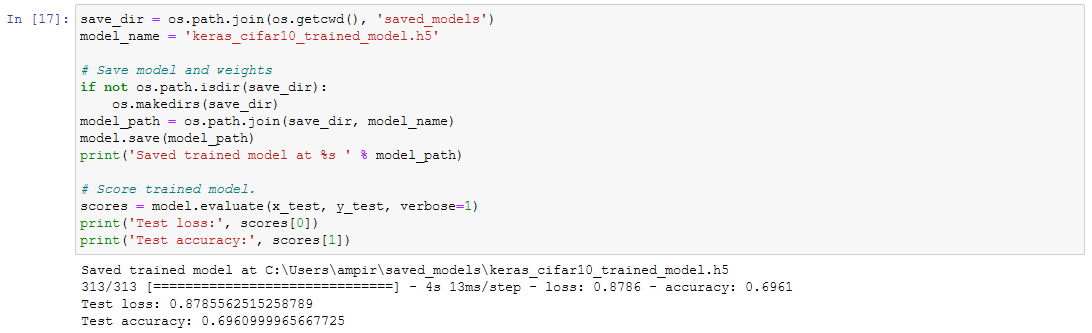

## Hyperparameter Tuning